<a href="https://colab.research.google.com/github/ZXEcoder/codespaces-jupyter/blob/main/bankchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("Churn_Modelling.csv")
df.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
796300/df.shape[0]

79.63

In [9]:
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)
df.drop('RowNumber',axis='columns',inplace=True)

In [10]:
df.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [11]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
def P_unique_value(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [13]:
P_unique_value(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [14]:
df.replace('Female',0,inplace=True)

In [15]:
df.replace('Male',1,inplace=True)

In [16]:
df.head(15)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


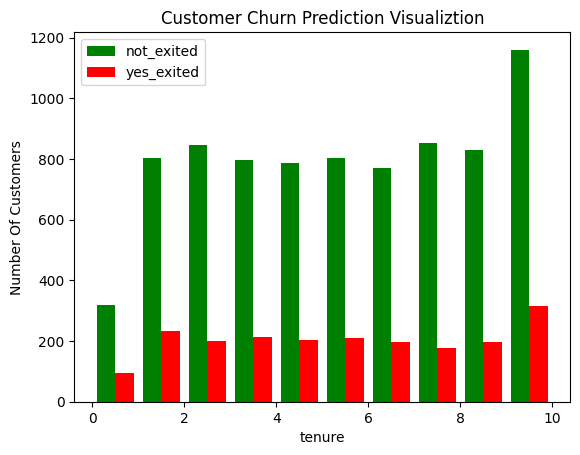

In [17]:
tenure_Exited_no = df[df.Exited==0].Tenure
tenure_Exited_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_Exited_no, tenure_Exited_yes],color=['green','red'],label=['not_exited','yes_exited'])
plt.legend()

In [18]:
df[df.Exited==0].Tenure.value_counts()

7     851
2     847
8     828
1     803
5     803
3     796
4     786
6     771
9     771
10    389
0     318
Name: Tenure, dtype: int64

In [19]:
df[df.Exited==1].Tenure.value_counts()

1     232
3     213
9     213
5     209
4     203
2     201
8     197
6     196
7     177
10    101
0      95
Name: Tenure, dtype: int64

In [20]:
df.tail(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,792,France,0,28,4,130142.79,1,1,0,38190.78,0


In [21]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,Spain,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,France,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,France,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,Spain,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0


In [23]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [24]:
X = df1.drop('Exited',axis='columns')
y = testLabels = df1.Exited.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

**Building an Ann model**:

In [25]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [26]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [27]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.7924
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7976
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8033
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8056
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8110
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8133
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8156
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8146
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.8171
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4149 - accura

# ***Mitigating Skewdness of Data***

**Method 1: Undersampling**

In [28]:
# Class count
count_class_0, count_class_1 = df1.Exited.value_counts()

# Divide by class
df_class_0 = df1[df1['Exited'] == 0]
df_class_1 = df1[df1['Exited'] == 1]

In [29]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [30]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [31]:
# Number of classes in training Data
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [32]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 5s 3ms/step - loss: 0.6846 - accuracy: 0.5585
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.6075
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6223
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6347 - accuracy: 0.6352
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6560
Epoch 6/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.6698
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5928 - accuracy: 0.6821
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.6867
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5746 - accuracy: 0.6956
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5672 - accura

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.76. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

#**Method2: Oversampling**

In [33]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Exited.value_counts())

Random over-sampling:
0    7963
1    7963
Name: Exited, dtype: int64


In [34]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
# Number of classes in training Data
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [36]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6514 - accuracy: 0.6217
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6063 - accuracy: 0.6761
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5823 - accuracy: 0.6958
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5633 - accuracy: 0.7144
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5381 - accuracy: 0.7334
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5122 - accuracy: 0.7528
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.7598
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.7655
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4831 - accuracy: 0.7641
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4812 - accura

Check classification report above. f1-score for minority class 1 improved from 0.57 to 0.79. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

#Method3: SMOTE

In [37]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [40]:
# Number of classes in training Data
y_train.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [41]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6403 - accuracy: 0.6363
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.6009 - accuracy: 0.6784
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5773 - accuracy: 0.6988
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7265
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5179 - accuracy: 0.7473
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4966 - accuracy: 0.7596
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.7662
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4823 - accuracy: 0.7663
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4787 - accuracy: 0.7694
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4754 - accura

SMOT Oversampling increases f1 score of minority class 1 from 0.57 to 0.81 (huge improvement) Also over all accuracy improves from 0.78 to 0.80

#Method4: Use of Ensemble with undersampling

In [42]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [44]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [45]:
6370/1630

3.9079754601226995

In [46]:
6370-4890

1480

model1 --> class1(1630) + class0(0, 1630)

model2 --> class1(1630) + class0(1631, 3261)

model3 --> class1(1630) + class0(3261, 4891)

model4 --> class1(1630) + class0(4892, 6370)

In [47]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [48]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
5710,0.856,1,0.216216,0.5,0.554265,0.333333,0,0,0.339721,1,0,0,0
3745,0.852,0,0.256757,0.1,0.371163,0.333333,1,1,0.980432,0,1,0,0
5429,0.664,0,0.405405,0.7,0.000000,0.333333,1,0,0.325318,1,0,0,0
551,0.648,1,0.391892,0.6,0.426077,0.000000,1,1,0.010339,0,1,0,1
8967,0.970,1,0.094595,0.7,0.000000,0.333333,1,1,0.417230,1,0,0,0


In [49]:
df2_class0 = df2[df2.Exited==0]
df2_class1 = df2[df2.Exited==1]

In [50]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Exited', axis='columns')
    y_train = df_train.Exited
    return X_train, y_train

In [51]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1630)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.7047 - accuracy: 0.4957
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6209
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6595
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6236 - accuracy: 0.6715
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6782
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6040 - accuracy: 0.6847
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.6933
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.6985
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7092
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5760 - accura

In [52]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1631, 3261)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6880 - accuracy: 0.5417
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6043
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6466
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6205 - accuracy: 0.6567
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.6748
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.6850
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5829 - accuracy: 0.6991
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7049
Epoch 9/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5587 - accuracy: 0.7206
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5414 - accura

In [53]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 3262, 4891)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.5330
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6416
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.6634
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6105 - accuracy: 0.6701
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.6846
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5893 - accuracy: 0.6981
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7008
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.7128
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7202
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5527 - accura

In [54]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 4892, 6370)

y_pred4 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
98/98 [==============================] - 1s 2ms/step - loss: 0.6674 - accuracy: 0.6068
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6560
Epoch 3/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6217 - accuracy: 0.6647
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.6770
Epoch 5/100
98/98 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.6818
Epoch 6/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.6808
Epoch 7/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.6937
Epoch 8/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.6992
Epoch 9/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7024
Epoch 10/100
98/98 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7053
Epoch 11/

In [55]:
len(y_pred1)

2000

In [56]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] +y_pred4[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [57]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.76      0.57       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000




f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.84 but at least there is some balance in terms of prediction accuracy across two classes